<a href="https://colab.research.google.com/github/VPonomarev42/LearningRep/blob/miniproject_2/stats/stats_miniproject_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import iqr

В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

Ссылка на данные: [тык](https://stepik.org/media/attachments/lesson/384453/conversion.csv).

# **Задание**
1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения
3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
4. Проанализируйте CTR с разбивкой по рекламной кампании.
5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
7. Посчитайте конверсию из клика в покупку.


**Описание данных**
* **ad_id** – идентификатор объявления (рекламы)
* **xyz_campaign_id** – идентификатор рекламной кампании в базе компании X
* **fb_campaign_id** – идентификатор кампании в Facebook
* **age** – возрастная группа, которой показывалась реклама
* **gender** – пол тех, кому показывалась реклама
* **interest** –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
* **impressions** – число показов
* **clicks** – число кликов
* **spent** – сумма, которую компания потратила на показ объявления 
* **total_conversion** – количество людей, которые заинтересовались продуктом после просмотра рекламы
* **approved_conversion** – количество людей, которые купили продукт после просмотра рекламы


---

---






1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

In [3]:
sns.set(rc={'figure.figsize':(10,5)}, style='whitegrid')

In [4]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/384453/conversion.csv')
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
data.shape

(1143, 11)

In [6]:
data.isna().value_counts()

ad_id  xyz_campaign_id  fb_campaign_id  age    gender  interest  Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion
False  False            False           False  False   False     False        False   False  False             False                  1143
dtype: int64

Пропусков в данных нет

In [7]:
data.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [8]:
data.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [9]:
data.age.unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [10]:
data.Approved_Conversion.unique()

array([ 1,  0,  3,  2, 14,  5, 10, 17, 21,  4,  9,  7,  8, 12,  6, 13])

2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения

In [11]:
data.groupby('xyz_campaign_id', as_index=False).agg({'Impressions':'sum'})

,xyz_campaign_id,Impressions
0,916,482925
1,936,8128187
2,1178,204823716


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


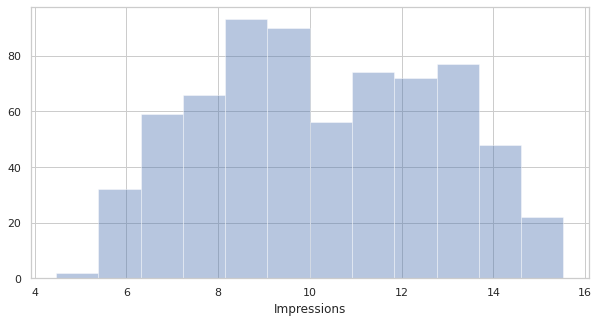

In [12]:
sns.distplot(np.log(data.groupby('fb_campaign_id').Impressions.sum()), kde=False)

3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

In [13]:
data['CTR'] = data.Clicks / data.Impressions * 100
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


In [14]:
data.CTR.describe()

count    1143.000000
mean        0.016420
std         0.011506
min         0.000000
25%         0.010022
50%         0.015981
75%         0.023364
max         0.105932
Name: CTR, dtype: float64

In [15]:
data.iloc[data.CTR.nlargest(1).index]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.105932


Реклама с самым большим показателем CTR

4. Проанализируйте CTR с разбивкой по рекламной кампании

In [16]:
data.xyz_campaign_id.unique()

array([ 916,  936, 1178])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


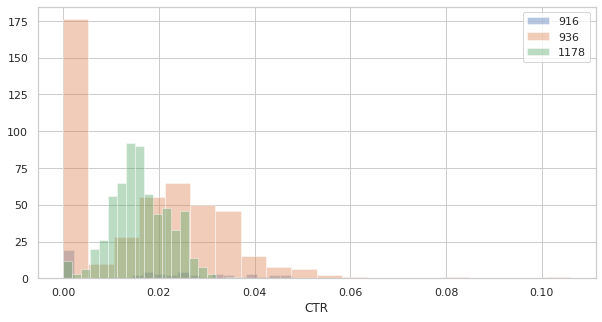

In [17]:
plt.figure()
sns.distplot(data.query('xyz_campaign_id == 916').CTR, kde=False, label='916', bins=20)
sns.distplot(data.query('xyz_campaign_id == 936').CTR, kde=False, label='936', bins=20)
sns.distplot(data.query('xyz_campaign_id == 1178').CTR, kde=False, label='1178', bins=20)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


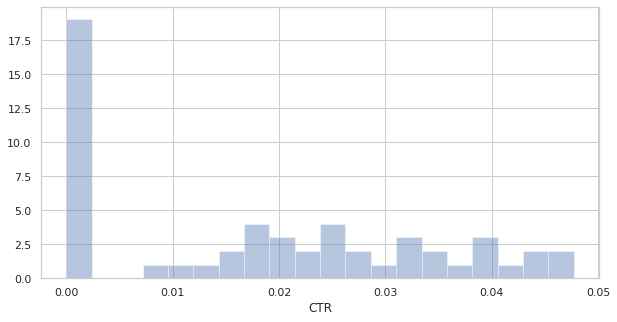

In [18]:
sns.distplot(data.query('xyz_campaign_id == 916').CTR, kde=False, label='916', bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


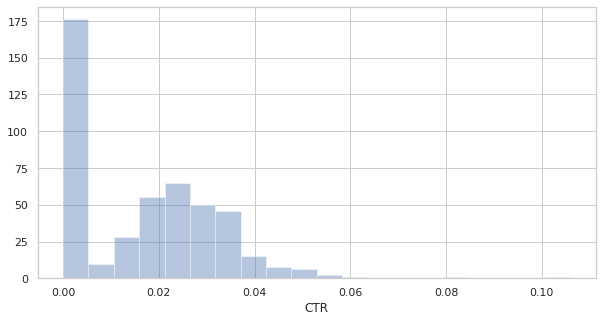

In [19]:
sns.distplot(data.query('xyz_campaign_id == 936').CTR, kde=False, label='936', bins=20)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


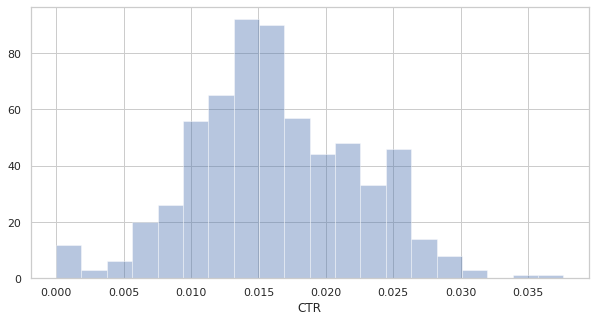

In [20]:
sns.distplot(data.query('xyz_campaign_id == 1178').CTR, kde=False, label='1178', bins=20)

5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости.

In [21]:
data['CPC'] = data.Spent / data.Clicks 
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29


In [22]:
data.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


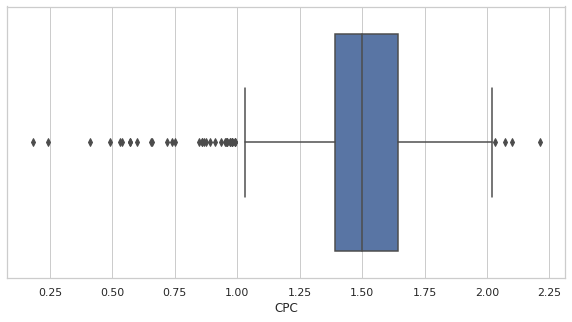

In [23]:
sns.boxplot(data.CPC.dropna())

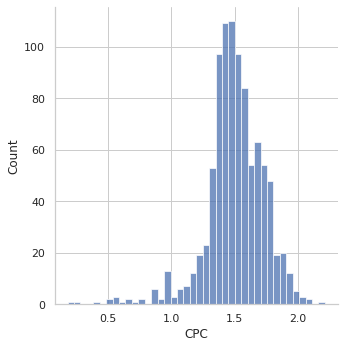

In [24]:
sns.displot(data.CPC.dropna(), kde=False)

In [25]:
print(f"Межквартильный интервал для показателя CPC = {iqr(data.CPC, nan_policy='omit')}")

Межквартильный интервал для показателя CPC = 0.25436369905


6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


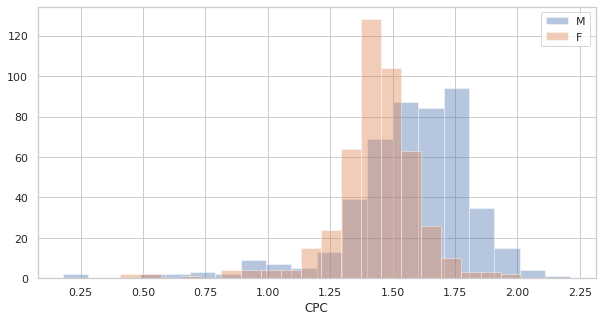

In [26]:
plt.figure()
sns.distplot(data.query("gender == 'M'").CPC, kde=False, label='M', bins=20)
sns.distplot(data.query("gender == 'F'").CPC, kde=False, label='F', bins=20)
plt.legend()
plt.show()

7. Посчитайте конверсию из клика в покупку.

In [27]:
data['conversion'] = data.Approved_Conversion / data.Clicks * 100
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29,100.0


In [28]:
data.query('ad_id == 1121814') #Ответ на вопрос задания

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.018936,1.454394,3.087886
